In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy
from kneed import KneeLocator

In [108]:
df = pd.read_csv('gapminder_internet.csv')
df = df.dropna()
df.head(214)

,country,incomeperperson,internetuserate,urbanrate
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70
5,Antigua and Barbuda,11894.464070,80.645455,30.46
...,...,...,...,...
207,Venezuela,5528.363114,35.850437,93.32
208,Vietnam,722.807559,27.851822,27.84
210,"Yemen, Rep.",610.357367,12.349750,30.64
211,Zambia,432.226337,10.124986,35.42


,internetuserate,incomeperperson
1,44.989947,1914.996551
2,12.500073,2231.993335
3,81.000000,21943.339900
4,9.999954,1381.004268
5,80.645455,11894.464070


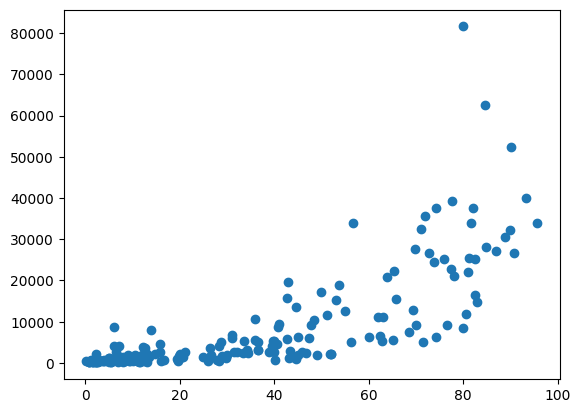

In [109]:
df = pd.read_csv('gapminder_internet.csv')
df = df.dropna()
df = df[["internetuserate","incomeperperson"]]
x = numpy.array(df)
xp = x[:,0]
yp = x[:,1]
plt.scatter(x = xp, y = yp)
df.head()

In [110]:
km = KMeans (n_clusters= 3,
init = 'random', n_init= 10, 
max_iter= 300, tol= 0.01, random_state=0 
)
y_km = km.fit_predict(x)
print([y_km == 0,0])

[array([False, False,  True, False,  True, False, False,  True,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False

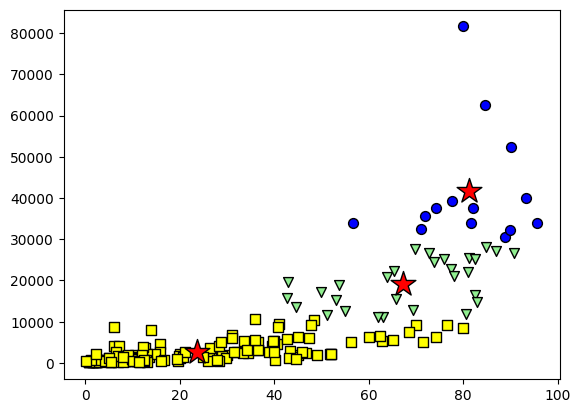

In [111]:
# Plot

plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='c1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='c2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='yellow',
    marker='s', edgecolor='black',
    label='c3'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=350, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

In [112]:
# Calculation for range of distortion of number of clusters

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

print(distortions)

[28325483444.82071, 7667952217.541218, 4548256589.398143, 2033181693.0324807, 1352579007.2482038, 933955196.7603759, 544971641.8156439, 447478694.39213014, 427015996.933716, 318761671.8897091]


In [113]:
kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

3

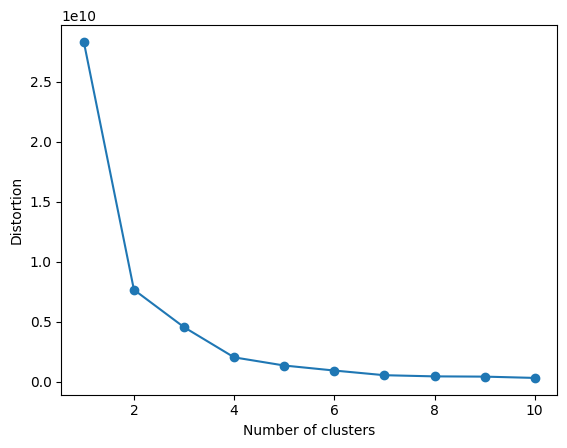

In [114]:
# Plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
